

<h1 align="center">
    NSDC Data Science Projects
</h1>
  
<h2 align="center">
    Project: Sentiment Analysis of Movie Reviews
</h2>

<h3 align="center">
    Name: (insert your name here)
</h3>


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'category' is a categorical variable, and 'real' and 'fake' are counts
sns.barplot(x='category', hue='fake', y='real', data=df)

# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count (or other numerical metric)')
plt.title('Distribution of real and fake in the News Dataset')

# Show the plot
plt.show()


### **Please read before you begin your project**

**Instructions: Google Colab Notebooks:**

Google Colab is a free cloud service. It is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources. We will be using Google Colab for this project.

Certain parts of this project will be completed individually, while other parts are encouraged to be completed with the rest of your team. In order to work within the Google Colab Notebook, **please start by clicking on "File" and then "Save a copy in Drive."** This will save a copy of the notebook in your personal Google Drive. Each member of your team should work on their personal copy.

Please rename the file to "DSP - Movie Reviews Analysis - Your Full Name."

You can now start working on the project. :)

**Project Description:**

This project will introduce students to an array of skills as they strive to create a sentiment analysis model to classify a given review as positive or negative. Sentiment Analysis leverages both Natural Language Processing and Machine Learning skills - how to represent text in a machine-understandable format so as to classify the text and extract sentiment. We will also cover visualizations and how to deploy models in the real world.



<h3 align = "center">
    Day #1
</h3>

NOTE: These steps are to be completed **individually**, not as a team.
GOAL: The main goal of this milestone is to set up your environment, install the required packages, learn how to acces data and do some basic exploratory data analysis.

**Step 1:**

Setting up libraries and installing packages

To install a library:
```python
 import <library> as <shortname>
```
We use a *short name* since it is easier to refer to the package to access functions and also to refer to subpackages within the library.


In [ ]:
print("Hello World! I am learning more about Data Science!")

Hello World! I am learning more about Data Science!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import seaborn as sns

These are the libraries that will help us throughout this project. It is not necessary that you know what each library does, but you can always look it up.

We encourage you to read more about the important and most commonly used packages like Pandas and Natural Language Toolkit (NLTK) and write a few lines in your own words about what they do. [You may use the Data Science Resource Repository (DSRR) to find resources to get started!](https://nebigdatahub.org/nsdc/data-science-resource-repository/)



**Step 2:**

Let’s access our data. We will be using the Internet Movie Database (IMDb) as our dataset. The dataset contains 50,000 movie reviews from the Internet Movie Database. Reviews have been pre-labeled with sentiment polarity (positive/negative).  


[The IMDb Movie Reviews dataset is available at this link](https://raw.githubusercontent.com/meghjoshii/NSDC_DataScienceProjects_SentimentAnalysis/main/IMDB%20Dataset.csv). It is better to use the link provided directly within the read_csv function.



We will use pandas to read the data from the csv file using the `read_csv` function. This function returns a pandas dataframe. We will store this dataframe in a variable called `df`.

In [ ]:
url = 'https://raw.githubusercontent.com/meghjoshii/NSDC_DataScienceProjects_SentimentAnalysis/main/IMDB%20Dataset.csv'


In [ ]:
data = pd.read_csv(url)

---

**Step 3:**

Let's see what the data looks like. We can use the `head` function which returns the first 5 rows of the dataframe.

In [ ]:
# TODO: Print the first 5 rows of the data using head function of pandas
#Head function
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


There are 2 columns in the dataframe - `review` and `sentiment`. The `review` column contains the text of the review and the `sentiment` column contains the sentiment of the review.

The `describe()` function gives us a summary of the data.

In [ ]:
# TODO: Describe the data using describe function of pandas
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


We can see that we have 50,000 reviews in our dataset. The `sentiment` column has 2 unique values - `positive` and `negative`.

Individual columns can be accessed using the `[]` operator. For example, `df['review']` returns the `review` column of the dataframe.

In [ ]:
print(data['review'])

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object


Let's see how many positive and negative reviews we have in our dataset. We can use the `value_counts()` function to get the count of each unique value in the `sentiment` column.

In [ ]:
# TODO: Use the value_counts function to count the number of positive and negative reviews on the sentiment column using the [] operator
sentiment_counts = data['sentiment'].value_counts()

print(sentiment_counts)


positive    25000
negative    25000
Name: sentiment, dtype: int64


We can see that we have 25,000 positive reviews and 25,000 negative reviews in our dataset. They are evenly distributed and we do not have to worry about class imbalance.

[Follow this link to learn more about class imbalance](https://machinelearningmastery.com/what-is-imbalanced-classification/).


---

**Step 4:**
Let's take a short break from coding and do some reading that is imperative to understand the concepts of this project.


The **objective** of our machine learning model will be to predict the sentiment of a review given the text of the review. So, the model needs to learn the relationship between the text of the review and the sentiment of the review. Hence, this is a supervised learning problem where the input is text and the output is a label.

[Click here to watch introductory videos and learn more about supervised machine learning](https://www.youtube.com/playlist?list=PLNs9ZO9jGtUCiGTo3iP0qmI9_qi8oYaRN).



Since we are going to be using text as input, we cannot directly use the text because computers do not understand text. We need to convert the text into a format that is useful for our classification model.

Count vectorization is a method to convert text into a format that is useful for classification models. It converts the text into a matrix of token counts meaning that each row in the matrix represents a review and each column represents a word. The value in each cell is the number of times that word occurs in that review. So, by learning the frequency of each word in each review, the model can learn the relationship between the text and the sentiment of the review. The intuition behind this is that positive reviews will have more positive words and negative reviews will have more negative words.

Now that we have established the intuition behind count vectorization, let's look at features of the count vectorizer. The features of the count vectorizer are the words that we want to consider. We would only want to use words that are relevant to the sentiment of the review. For example, if we are classifying reviews of movies, we would not want to consider words like `the`, `a`, `an` etc. because they are not relevant to the sentiment of the review. Also, we would want to consider words that occur frequently in the reviews. For example, if a word occurs only once in the entire dataset, it is not very useful for our model.

To remove words that are not relevant to the sentiment of the review, first we need to tokenize the text.

Tokenization is the process of splitting a string into a list of tokens. This helps us to break down the text into smaller chunks which are easier to work with. What we essentially want to do  is remove all the punctuation and special characters from the text because they do not add any value to the text. We also want to convert all the text to lowercase so that the model does not treat the same word with different cases as different words.



<h3 align = "center">
    Day #2
</h3>

NOTE: These steps are to be completed **individually**, not as a team.

GOAL: The main goal of this milestone is to learn natural langauge processing and how to use the NLTK library to preprocess text. We will also learn how to use the CountVectorizer class to convert text into a format that is useful for classification models.

**Step 1:**

We will use the `nltk` library to perform these preprocessing steps. First, we will use the `word_tokenize` function to tokenize the text.

In [ ]:
# We apply the word_tokenize function to the reviews in the dataset and assign the tokenized reviews to the existing column in the dataset.
# We can use the apply function to apply the word_tokenize function to the reviews column in the dataset.
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
data['review'] = data['review'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# We can see that the `review` column now contains a list of tokens for each review. Let's see what the first review looks like.
data['review'][1]

['A',
 'wonderful',
 'little',
 'production',
 '.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming-',
 'very',
 'old-time-BBC',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 ',',
 'and',
 'sometimes',
 'discomforting',
 ',',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 '.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen-',
 'Michael',
 'Sheen',
 'not',
 'only',
 '``',
 'has',
 'got',
 'all',
 'the',
 'polari',
 "''",
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 '!',
 'You',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'Williams',
 "'",
 'diary',
 'entries',
 ',',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 '.',
 'A',
 'masterful

We see that the text has been tokenized into a list of words. Also, the list contains punctuation and special characters which we do not want.

---

**Step 2:**


Let's clean the text by removing punctuations, special characters and converting the text to lowercase. We will use the `isalpha` function to check if a word is an alphabet. If it is not an alphabet, we will remove it from the list. We will also convert the text to lowercase using the `lower` function. Next, we will remove the stopwords from the list. Stopwords are words that do not add any value to the text. For example, `the`, `a`, `an` etc. are stopwords. We will use the `stopwords` function from the `nltk.corpus` package to get a list of stopwords. We will then use the `remove` function to remove the stopwords from the list.

In [ ]:
# isalpha() function returns True if all the characters in the string are alphabets. If not, it returns False.

# We can use the isalpha() function to remove all the punctuations and numbers from the reviews.

data['review'] = data['review'].apply(lambda x: [item for item in x if item.isalpha()])

In [ ]:
data

,review,sentiment
0,"[One, of, the, other, reviewers, has, mentione...",positive
1,"[A, wonderful, little, production, br, br, The...",positive
2,"[I, thought, this, was, a, wonderful, way, to,...",positive
3,"[Basically, there, a, family, where, a, little...",negative
4,"[Petter, Mattei, Love, in, the, Time, of, Mone...",positive
...,...,...
49995,"[I, thought, this, movie, did, a, down, right,...",positive
49996,"[Bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[I, am, a, Catholic, taught, in, parochial, el...",negative
49998,"[I, going, to, have, to, disagree, with, the, ...",negative


In [ ]:
print(" ".join(data['review'][1]))

A wonderful little production br br The filming technique is very very fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br The actors are extremely well Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great master of comedy and his life br br The realism really comes home with the little things the fantasy of the guard which rather than use the traditional techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwell murals decorating every surface are terribly well done


In [ ]:
#TODO: convert to lowercase
#complete the code below
#df[''] = df[''].apply(lambda x: [item. for item in x])

#This is where i will turn my data into only lower case letters
data['review'] = data['review'].apply(lambda x: [item.lower() for item in x])

In [ ]:
data

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, br, br, the...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, there, a, family, where, a, little...",negative
4,"[petter, mattei, love, in, the, time, of, mone...",positive
...,...,...
49995,"[i, thought, this, movie, did, a, down, right,...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[i, am, a, catholic, taught, in, parochial, el...",negative
49998,"[i, going, to, have, to, disagree, with, the, ...",negative


In [ ]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

data['review'] = data ['review'].apply(lambda x: [item for item in x if item not in stop_words])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


---

**Step 3:**

Now that we have cleaned the text, we need to use a stemmer to stem the words. Stemming is the process of reducing a word to its root form. For example, the root form of the word `running` is `run`. Stemming helps us to reduce the number of unique words in the text. We will use the `PorterStemmer` function from the `nltk.stem` package to stem the words.

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

data['review'] = data['review'].apply(lambda x:[ps.stem(item) for item in x])

---
---

In [ ]:
data['review'] = data['review'].apply(lambda x: " ".join(x)if x else "")



<h3 align = "center">
    Day #3
</h3>

NOTE: These steps are to be completed **individually**, not as a team.

GOAL: The main goal of this milestone is to split the dataset into training and testing sets. We will also learn how to use the CountVectorizer class to convert text into a format that is useful for classification models. We will also learn how to use the MultinomialNB class to train a Naive Bayes classifier.

Training and Testing Data:

Machine learning uses algorithms to learn from data in datasets. They find patterns, develop understanding, make decisions, and evaluate those decisions.

In machine learning, datasets are split into two subsets:

The first subset is known as the **training data** - it’s a portion of our actual dataset that is fed into the machine learning model to discover and learn patterns. In this way, it trains our model.

The other subset is known as the **testing data**.

Once your machine learning model is built (with your training data), you need unseen data to test your model. This data is called testing data, and you can use it to evaluate the performance and progress of your algorithms’ training and adjust or optimize it for improved results.

Testing data has two main criteria. It should:

1. Represent the actual dataset
2. Be large enough to generate meaningful predictions


**Step 1:**

Now, the data is tokenized, cleaned and reduced to its root form.
The next step is to split the data for training and testing. We split the data because we need to train our model on some data and test it on some data. We have a total of 50,000 reviews, so let's split it into 40,000 reviews for training and 10,000 reviews for testing.
To do this, we can use the slice operator `:`. For example, `df[:30000]` returns the first 30,000 rows of the dataframe. Similarly, `df[30000:]` returns the last 20,000 rows of the dataframe.

Name the training data as `train_reviews` and testing data as `test_reviews`. Remember, we are only splitting the reviews column and will do the same for sentiment in the next step.

In [ ]:
#train reviews
train_reviews = data.review[:40000]

In [ ]:
#test reviews
test_reviews = data.review[40000:]

Now let us do the same for the sentiment column. Name the training data as `train_sentiments` and testing data as `test_sentiments`.

In [ ]:
#TODO: train sentiments
train_sentiment = data.sentiment[:40000]

In [ ]:
#TODO: test sentiments
test_sentiment = data.sentiment[40000:]

---


**Step 2:**

We need to make a few changes to the data before we can use it to train our model. First, we need to convert the data into a format that is useful for our model. We will use the `CountVectorizer` function from the `sklearn.feature_extraction.text` package to convert the text into a matrix of token counts.

For the sentiment column, we need to convert the labels into numbers. We will use the `LabelEncoder` function from the `sklearn.preprocessing` package to convert the labels into numbers.

[To read more about Count Vectorizer, follow this link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). [You can also use this link to read more about Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Please go through the parameters of both these functions to better understand the code below.

In [ ]:
#Count vectorizer for bag of words
cv = CountVectorizer(min_df=0, max_df=1, binary = False, ngram_range= (1,3))

To transform the data, we will use the `fit_transform` function. The `fit_transform` function fits the model to the data and then transforms the data into a matrix of token counts. We will use the `fit_transform` function on the training data and the `transform` function on the testing data. This is because we only want to fit the model to the training data and not the testing data.

In [ ]:
#transformed train reviews
cv_train_reviews = cv.fit_transform(train_reviews)



In [ ]:
#transformed test reviews
cv_test_reviews = cv.transform(test_reviews)

Again, for the sentiment column, we will use the `fit_transform` function on the training data and the `transform` function on the testing data.

In [ ]:
#labeling the sentiment data
lb = LabelBinarizer()

In [ ]:
# transformed sentiment data
lb_train_sentiments = lb.fit_transform(train_sentiment)

In [ ]:
#TODO: transformed test sentiment data (similar to count vectorizer, transform test reviews, name it lb_test_sentiments)
# Remember to use transform and not fit_transform
lb_test_binary = lb.fit_transform(test_sentiment)

---

**Step 3:**

Model Building: In this step, we will build our model. We will use the `MultinomialNB` function from the `sklearn.naive_bayes` package to build our model. The Multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. Bag-of-Word counts are an example of integer-valued discrete features.

[Please read about the Multinomial Naive Bayes classifier here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and write about it in the comments below.

<h4 style="color:orange">
    TO-DO
</h4>

Write a few lines about the following:

- **Machine Learning Classifiers:**

- **Naive Bayes Classifier:**




The first part is to train and fit the Multinomial Naive Bayes classifier to the training data. We will use the `fit` function to train the model on the training data.

In [ ]:
# training the model
mnb = MultinomialNB()

In [ ]:
# fitting the model
mnb_bow = mnb.fit(cv_train_reviews, lb_train_sentiments)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Predicting the model for bag of words
mnb_bow_predict = mnb.predict(cv_test_reviews)


In [ ]:
#Accuracy score for bag of words
mnb_bow_score = accuracy_score(lb_test_binary, mnb_bow_predict)
print("Accuracy :", mnb_bow_score)

Accuracy : 0.7425


If you have completed all the steps correctly, you should see an accuracy of ~70-80%. This is decent, but not a very good accuracy since language is a very complex thing. But it's a great start!

---
---

<h3 align = "center">
    Milestone #4
</h3>

NOTE: This milestone is to be completed as a **group**.  Each group member should try a different classifier and you must discuss the results with your teammates. Please attend Office Hours or ask your questions on Slack.

GOAL: The main goal of this milestone is to understand how to use different classifiers to train a model and how to evaluate the performance of the model.

**Step 1:**

[Please read about the different classifiers here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
Each team member should try at least one **different** classifier. You can try more than one classifier if you want. Please write about the classifier you have chosen in the comments below.

In [ ]:
#Enter your code here

**Step 2:**

Data Visualizations are a great way to understand the data. [If you are interested in finding additional resources on Data Visualization, we recommend leveraging the DSRR resources, linked here.](https://nebigdatahub.org/nsdc/data-science-resource-repository/) We will be using word clouds to visualize the data. Word clouds are a great way to visualize the most frequent words in a text. We will use the `WordCloud` function from the `wordcloud` package to visualize the most frequent words in the reviews.

[Please read about the WordCloud function here](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html).



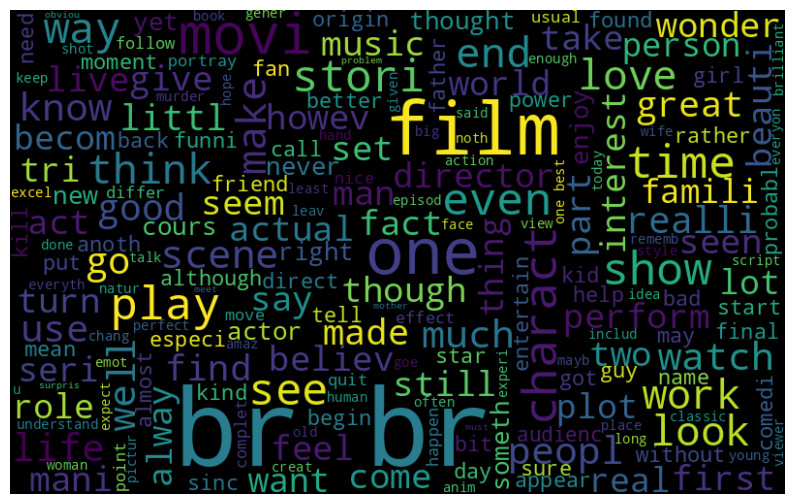

In [ ]:
# word cloud for positive review words in the entire dataset
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

#join all the positive reviews
positive_words = ' '.join(list(data[data['sentiment'] == 'positive']['review']))

#word cloud for positive words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



In [ ]:
# TODO: Word cloud for negative reviews in the dataset

---

<h3 align = 'center' >
Thank you for completing the project!
</h3>

Please do reach out to us if you have any questions or concerns. We are here to help you learn and grow.
